# Projeto Final – Data Mining – Telco Churn

Este notebook implementa o projeto final de Data Mining, seguindo a metodologia **CRISP-DM** e respondendo às três questões de negócio indicadas no enunciado:

1. Os clientes mais jovens apresentam maior probabilidade de churn do que os mais velhos?
2. O tipo de subscrição (Subscription Type) influencia o risco de churn?
3. Clientes com maior frequência de utilização (heavy users) tendem a apresentar menor churn?

Além da análise exploratória, será construído um modelo preditivo de churn e discutidas possíveis ações de retenção.

**Data Mining - ULHT**

**LIG - 2025/26**

Trabalho realizado por:

**Amir Ajij (a22304529) - Dhiren Lalitcumar (a22303499) - Nur Amade (a22409156)**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    RocCurveDisplay
)

# Para ver todas as colunas quando fazemos head()
pd.set_option("display.max_columns", None)

# Carregar dataset
file_path = "Telco_churn_final (2025).csv"
df = pd.read_csv(file_path)

# Copia de segurança do dataset original
df_raw = df.copy()

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Pricing Plan
0,1,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0,NaN
1,2,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0,NaN
2,3,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0,NaN
3,4,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0,NaN
4,5,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0,NaN


## 1. Business Understanding

O objetivo deste projeto é analisar os dados de clientes de uma empresa de telecomunicações e:

- Compreender os fatores que influenciam a saída de clientes (**churn**);
- Responder às três questões de negócio definidas no enunciado:
  1. Os clientes mais jovens apresentam maior probabilidade de churn do que os mais velhos?
  2. O tipo de subscrição (`Subscription Type`) influencia o risco de churn?
  3. Clientes com maior frequência de utilização (heavy users) tendem a apresentar menor churn?

Além da análise descritiva, será desenvolvido um modelo preditivo de churn que permita, no futuro, identificar clientes com maior risco de abandono e suportar ações de retenção.

In [ ]:
print("Dimensão do dataset (linhas, colunas):", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

print("\nPrimeiras linhas:")
display(df.head())

Dimensão do dataset (linhas, colunas): (74374, 13)

Tipos de dados:
CustomerID             int64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
Pricing Plan          object
dtype: object

Primeiras linhas:


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Pricing Plan
0,1,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0,NaN
1,2,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0,NaN
2,3,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0,NaN
3,4,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0,NaN
4,5,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0,NaN


In [ ]:
print("Número de valores em falta por coluna:")
print(df.isna().sum())

print("\nDescrição estatística das variáveis numéricas:")
display(df.describe())

print("\nValores únicos por coluna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

Número de valores em falta por coluna:
CustomerID               0
Age                   1513
Gender                1548
Tenure                 476
Usage Frequency       1487
Support Calls          476
Payment Delay          476
Subscription Type     1520
Contract Length        476
Total Spend           1527
Last Interaction       476
Churn                  476
Pricing Plan         72409
dtype: int64

Descrição estatística das variáveis numéricas:


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,74374.000000,72861.000000,73898.000000,72887.000000,73898.000000,73898.000000,72847.000000,73898.000000,73898.000000
mean,149541.951825,42.215712,42.860551,16.548671,5.915749,17.131032,881.661496,15.510000,0.473396
std,298257.481353,18.149265,71.898777,12.461855,4.476218,8.850092,2464.801734,8.642137,0.499295
min,1.000000,-3.000000,1.000000,1.000000,0.000000,0.000000,-50.000000,1.000000,0.000000
25%,18594.250000,29.000000,17.000000,7.000000,3.000000,10.000000,295.000000,8.000000,0.000000
50%,37187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,529.000000,16.000000,0.000000
75%,55780.750000,54.000000,48.000000,23.000000,8.000000,25.000000,777.000000,23.000000,1.000000
max,909999.000000,150.000000,500.000000,80.000000,30.000000,30.000000,20000.000000,30.000000,1.000000



Valores únicos por coluna:
CustomerID: 74374 valores únicos
Age: 51 valores únicos
Gender: 6 valores únicos
Tenure: 62 valores únicos
Usage Frequency: 33 valores únicos
Support Calls: 13 valores únicos
Payment Delay: 31 valores únicos
Subscription Type: 7 valores únicos
Contract Length: 3 valores únicos
Total Spend: 906 valores únicos
Last Interaction: 30 valores únicos
Churn: 2 valores únicos
Pricing Plan: 11 valores únicos


In [ ]:
print(df['Churn'].value_counts())
print("\nProporções:")
print(df['Churn'].value_counts(normalize=True))

Churn
0.0    38915
1.0    34983
Name: count, dtype: int64

Proporções:
Churn
0.0    0.526604
1.0    0.473396
Name: proportion, dtype: float64


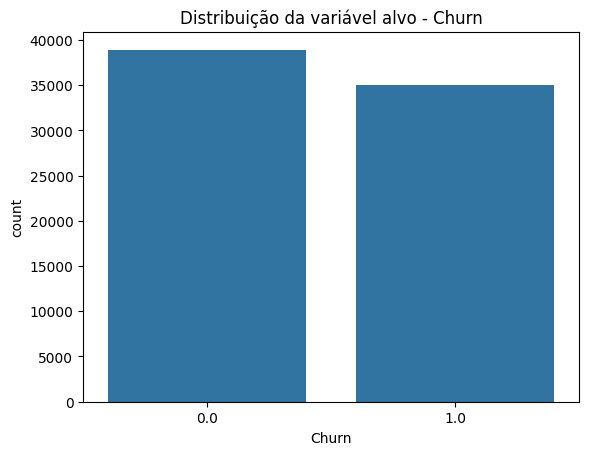

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Distribuição da variável alvo - Churn")
plt.show()

In [ ]:
linhas_antes = df.shape[0]
df = df.dropna(subset=['Churn'])
linhas_depois = df.shape[0]

print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois de remover NaN em Churn: {linhas_depois}")
print(f"Linhas removidas: {linhas_antes - linhas_depois}")

Linhas antes: 74374
Linhas depois de remover NaN em Churn: 73898
Linhas removidas: 476


In [ ]:
cols_to_drop = ['CustomerID', 'Pricing Plan']

for col in cols_to_drop:
    if col in df.columns:
        print(f"A remover coluna: {col}")
        df = df.drop(columns=[col])

df.columns

A remover coluna: CustomerID
A remover coluna: Pricing Plan


Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [ ]:
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']

for col in cat_cols:
    print(f"\n===== {col} =====")
    print(df[col].value_counts(dropna=False).head(20))


===== Gender =====
Gender
Female     38363
Male       33500
NaN         1072
femlae       243
FEMALE       242
 male        240
MaLe         238
Name: count, dtype: int64

===== Subscription Type =====
Subscription Type
Basic         24021
Standard      23967
Premium       23886
NaN            1044
BASIC           261
 stAndard       258
 PremiuM        238
premium_        223
Name: count, dtype: int64

===== Contract Length =====
Contract Length
Monthly      25418
Annual       24491
Quarterly    23989
Name: count, dtype: int64


In [ ]:
# Criar uma cópia temporária para normalizar o texto
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()

# Corrigir algumas variantes comuns:
gender_map = {
    'female': 'Female',
    'femlae': 'Female',
    'f': 'Female',
    'male': 'Male',
    'm': 'Male',
    'nan': np.nan,
    'none': np.nan,
}

df['Gender'] = df['Gender'].replace(gender_map)

# Como fizemos lower() antes, voltamos a um formato limpo:
df['Gender'] = df['Gender'].replace({'female': 'Female', 'male': 'Male'})

print(df['Gender'].value_counts(dropna=False))

Gender
Female    38848
Male      33978
NaN        1072
Name: count, dtype: int64


In [ ]:
df['Subscription Type'] = df['Subscription Type'].astype(str).str.strip().str.lower()

def normalize_subscription(x):
    if 'basic' in x:
        return 'Basic'
    if 'standard' in x:
        return 'Standard'
    if 'premium' in x:
        return 'Premium'
    if x in ['nan', 'none', '']:
        return np.nan
    return 'Other' # Last last case

df['Subscription Type'] = df['Subscription Type'].apply(normalize_subscription)

print(df['Subscription Type'].value_counts(dropna=False))

Subscription Type
Premium     24347
Basic       24282
Standard    24225
NaN          1044
Name: count, dtype: int64


In [ ]:
df['Contract Length'] = df['Contract Length'].astype(str).str.strip().str.title()

print(df['Contract Length'].value_counts(dropna=False))

Contract Length
Monthly      25418
Annual       24491
Quarterly    23989
Name: count, dtype: int64


In [ ]:
print("Idade - antes:")
print(df['Age'].describe())

# Substituir idades fora do intervalo por NaN
df.loc[(df['Age'] < 18) | (df['Age'] > 90), 'Age'] = np.nan

print("\nIdade - depois de tratar outliers:")
print(df['Age'].describe())
print("Valores em falta em Age:", df['Age'].isna().sum())

Idade - antes:
count    72861.000000
mean        42.215712
std         18.149265
min         -3.000000
25%         29.000000
50%         42.000000
75%         54.000000
max        150.000000
Name: Age, dtype: float64

Idade - depois de tratar outliers:
count    70795.000000
mean        41.985748
std         13.925722
min         18.000000
25%         30.000000
50%         42.000000
75%         54.000000
max         65.000000
Name: Age, dtype: float64
Valores em falta em Age: 3103


In [ ]:
print("Total Spend - antes:")
print(df['Total Spend'].describe())
print("Valores negativos em Total Spend:", (df['Total Spend'] < 0).sum())

# Valores negativos = NaN
df.loc[df['Total Spend'] < 0, 'Total Spend'] = np.nan

print("\nTotal Spend - depois:")
print(df['Total Spend'].describe())
print("Valores em falta em Total Spend:", df['Total Spend'].isna().sum())

Total Spend - antes:
count    72847.000000
mean       881.661496
std       2464.801734
min        -50.000000
25%        295.000000
50%        529.000000
75%        777.000000
max      20000.000000
Name: Total Spend, dtype: float64
Valores negativos em Total Spend: 1048

Total Spend - depois:
count    71799.000000
mean       895.260310
std       2480.135154
min          5.000000
25%        305.000000
50%        536.000000
75%        781.000000
max      20000.000000
Name: Total Spend, dtype: float64
Valores em falta em Total Spend: 2099


In [ ]:
# Identificar colunas numéricas e categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
Categóricas: ['Gender', 'Subscription Type', 'Contract Length']


In [ ]:
num_cols = [c for c in num_cols if c != 'Churn']

# Imputação numéricas
for col in num_cols:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)

# Imputação categóricas
for col in cat_cols:
    moda = df[col].mode(dropna=True)
    if len(moda) > 0:
        df[col] = df[col].fillna(moda[0])
    else:
        df[col] = df[col].fillna("Unknown")

print("Missing values após imputação:")
print(df.isna().sum())

Missing values após imputação:
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
# Garantir que Churn é inteiro 0/1
df['Churn'] = df['Churn'].astype(int)

# One-hot encoding
df_model = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Shape após encoding one-hot:", df_model.shape)
df_model.head()

Shape após encoding one-hot: (73898, 13)


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,22.0,25.0,14.0,4.0,27.0,598.0,9.0,1,False,False,False,True,False
1,41.0,28.0,28.0,7.0,13.0,584.0,20.0,0,False,False,True,True,False
2,47.0,27.0,10.0,2.0,29.0,757.0,21.0,0,True,True,False,False,False
3,35.0,9.0,12.0,5.0,17.0,232.0,18.0,0,True,True,False,False,True
4,53.0,58.0,24.0,9.0,2.0,533.0,18.0,0,False,False,True,False,False


In [ ]:
# Criar faixas etárias
bins = [18, 25, 35, 45, 55, 65, 90]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

churn_by_age = df.groupby('AgeGroup')['Churn'].mean().reset_index()

print(churn_by_age)

  AgeGroup     Churn
0    18-24  0.448039
1    25-34  0.442301
2    35-44  0.449681
3    45-54  0.493525
4    55-64  0.527747
5      65+       NaN


/tmp/ipython-input-2599933327.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby('AgeGroup')['Churn'].mean().reset_index()


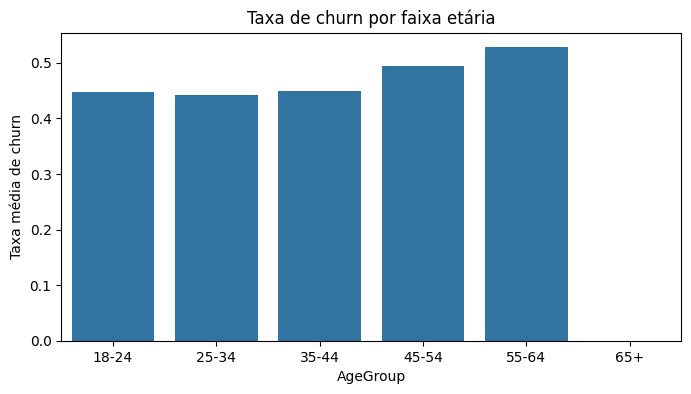

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=churn_by_age, x='AgeGroup', y='Churn')
plt.ylabel("Taxa média de churn")
plt.title("Taxa de churn por faixa etária")
plt.show()

### Interpretação do gráfico: Taxa de churn por faixa etária

O gráfico apresenta a **taxa média de churn** (eixo vertical) para cada **faixa etária** (eixo horizontal).

Observa-se que:
- As faixas mais jovens (18–24 e 25–34) têm uma taxa de churn situada nos **~44–45%**.
- A faixa 35–44 mantém um valor muito semelhante, também perto dos **45%**.
- A partir dos 45 anos, a taxa de churn **aumenta**:
  - 45–54: aproximadamente **49%**;
  - 55–64: aproximadamente **53%**, sendo o grupo com maior churn.

Isto significa que, neste dataset, **não se confirma a ideia de que os clientes mais jovens têm maior churn**.  
Pelo contrário, os clientes de meia-idade e mais velhos (especialmente 45–54 e 55–64) apresentam uma probabilidade de abandono ligeiramente superior.

### Resposta à Q1 – Idade vs Churn

A análise por faixas etárias mostra que as taxas de churn são:

- 18–24: 44,8%
- 25–34: 44,2%
- 35–44: 45,0%
- 45–54: 49,4%
- 55–64: 52,8%

Ou seja, **os clientes mais jovens não apresentam maior probabilidade de churn**.
Pelo contrário, as faixas mais velhas (45–54 e 55–64) têm uma taxa de churn
ligeiramente superior. Assim, no dataset analisado, a idade não confirma a hipótese
de que “jovens churnam mais”.

In [ ]:
# Usar df_model (com one-hot encoding)
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Proporção de churn no y_train:", y_train.mean())
print("Proporção de churn no y_test:", y_test.mean())

X_train shape: (59118, 12)
X_test shape: (14780, 12)
Proporção de churn no y_train: 0.4733921986535404
Proporção de churn no y_test: 0.47341001353179973


In [ ]:
# Taxa de churn por tipo de subscrição
churn_by_sub = (
    df.groupby('Subscription Type')['Churn']
      .mean()
      .reset_index()
      .sort_values('Churn', ascending=False)
)

print(churn_by_sub)

  Subscription Type     Churn
0             Basic  0.482827
2          Standard  0.473271
1           Premium  0.464495


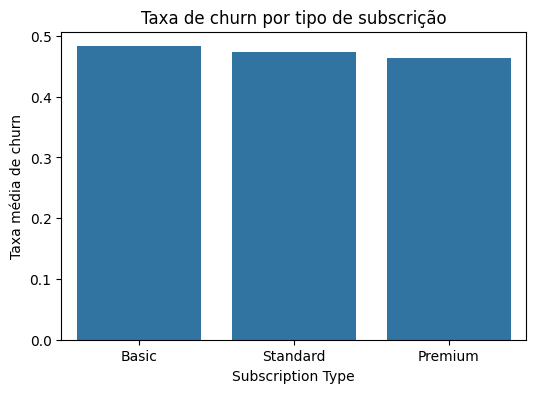

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=churn_by_sub, x='Subscription Type', y='Churn')
plt.ylabel("Taxa média de churn")
plt.title("Taxa de churn por tipo de subscrição")
plt.show()

### Interpretação do gráfico: Taxa de churn por tipo de subscrição

Neste gráfico comparamos a **taxa média de churn** para cada **tipo de subscrição**:

- Clientes com plano **Basic** apresentam a maior taxa de churn (cerca de **48%**).
- O plano **Standard** tem um churn ligeiramente mais baixo (cerca de **47%**).
- O plano **Premium** é o que tem **menor churn**, próximo dos **46%**.

As diferenças não são enormes, mas indicam que **o tipo de subscrição influencia moderadamente o churn**.  
De forma geral, clientes em planos de maior valor (**Premium**) parecem estar **um pouco mais fidelizados**, enquanto os clientes de planos **Basic** têm maior probabilidade de abandonar o serviço.

### Resposta à Q2 – Subscription Type vs Churn

As taxas de churn por tipo de subscrição são aproximadamente:

- Basic: 48,3%
- Standard: 47,3%
- Premium: 46,4%

Conclui-se que **o tipo de subscrição influencia o risco de churn de forma moderada**:
clientes em planos Basic têm maior probabilidade de sair, enquanto clientes Premium
têm um churn ligeiramente inferior. Esta diferença, embora não extrema, sugere que
planos de maior valor podem estar associados a maior fidelização.

In [ ]:
df['Usage Frequency'].describe()

,Usage Frequency
count,73898.000000
mean,16.527484
std,12.377622
min,1.000000
25%,8.000000
50%,15.000000
75%,23.000000
max,80.000000


In [ ]:
q1 = df['Usage Frequency'].quantile(0.33)
q2 = df['Usage Frequency'].quantile(0.66)

def usage_group(x):
    if x <= q1:
        return 'Low'
    elif x <= q2:
        return 'Medium'
    else:
        return 'High'

df['UsageGroup'] = df['Usage Frequency'].apply(usage_group)

churn_by_usage = df.groupby('UsageGroup')['Churn'].mean().reset_index().sort_values('Churn', ascending=False)
print(churn_by_usage)

  UsageGroup     Churn
1        Low  0.549863
0       High  0.435356
2     Medium  0.432621


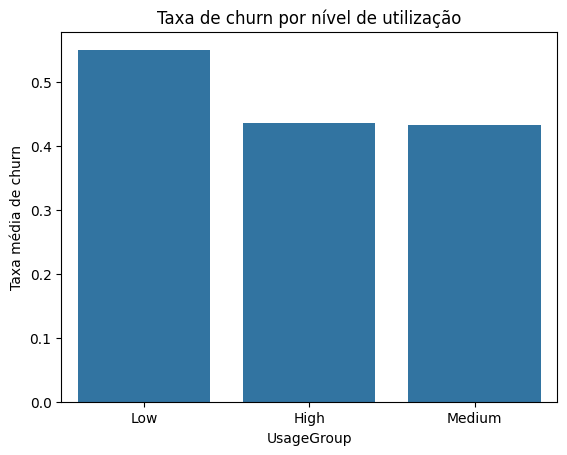

In [ ]:
sns.barplot(data=churn_by_usage, x='UsageGroup', y='Churn')
plt.ylabel("Taxa média de churn")
plt.title("Taxa de churn por nível de utilização")
plt.show()

### Interpretação do gráfico: Taxa de churn por nível de utilização

O gráfico mostra a **taxa média de churn** para três grupos de utilização:

- **Low** – clientes com baixa frequência de utilização;
- **Medium** – utilização intermédia;
- **High** – heavy users (utilização elevada).

Os resultados indicam que:
- O grupo **Low** tem uma taxa de churn em torno dos **55%**, claramente superior.
- Os grupos **Medium** e **High** apresentam churn significativamente mais baixo, cerca de **43–44%**.

Isto confirma a hipótese de que **clientes com maior utilização tendem a ter menor churn**.  
Em termos de negócio, faz sentido: clientes que usam pouco o serviço têm menos “ligações” à empresa e estão mais disponíveis para cancelar, enquanto heavy users retiram mais valor e são mais propensos a manter o contrato.

### Resposta à Q3 – Nível de Utilização vs Churn

As taxas de churn por nível de utilização são:

- Low: 55,0%
- Medium: 43,3%
- High: 43,5%

Verifica-se que **clientes com baixa utilização apresentam churn significativamente
mais elevado**. Já os heavy users (High) e o grupo Medium têm churn bastante mais
baixo (~43%). Isto suporta a hipótese de que clientes com maior frequência de
utilização tendem a ser mais fiéis à empresa.

=== Logistic Regression ===
Accuracy: 0.8052097428958052
ROC AUC: 0.8832377841636982

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      7783
           1       0.79      0.80      0.80      6997

    accuracy                           0.81     14780
   macro avg       0.80      0.81      0.80     14780
weighted avg       0.81      0.81      0.81     14780



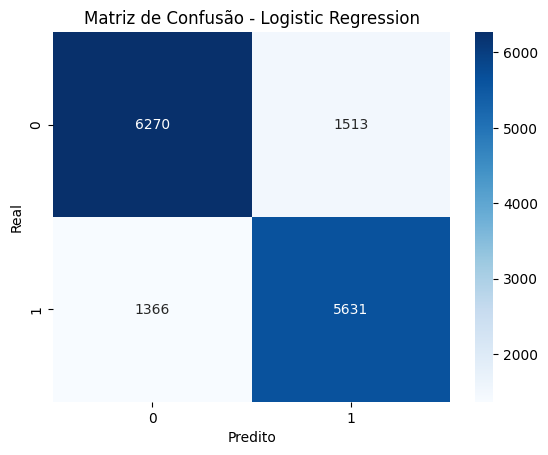

In [ ]:
# Escalar features numéricas apenas
num_features = num_cols  # as que definimos antes
# Mas atenção: algumas foram transformadas em dummies, aqui simplificamos e escalamos tudo
# Logistic Regression tolera isto, mas o ideal seria pipeline

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print("\nClassification report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

### Interpretação da Matriz de Confusão – Logistic Regression

A matriz de confusão resume os resultados do modelo de **Logistic Regression**:

- **Verdadeiros Negativos (TN)** – clientes sem churn corretamente previstos como 0 (canto superior esquerdo).
- **Falsos Positivos (FP)** – clientes sem churn previstos como churn (canto superior direito).
- **Falsos Negativos (FN)** – clientes com churn previstos como 0 (canto inferior esquerdo).
- **Verdadeiros Positivos (TP)** – clientes com churn corretamente previstos como 1 (canto inferior direito).

Neste caso, o modelo:
- Acerta em grande parte dos clientes, tanto churn como não churn.
- Ainda assim, apresenta **alguns falsos positivos e falsos negativos**, o que é normal num modelo linear.

De forma geral, a matriz mostra que a regressão logística já tem **desempenho razoável**, mas há espaço para melhorar a capacidade de distinguir clientes que vão realmente abandonar do serviço.

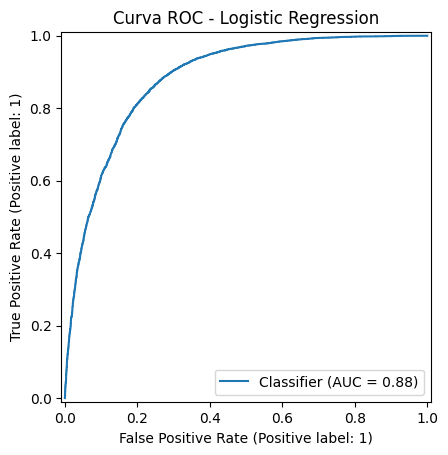

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba_lr)
plt.title("Curva ROC - Logistic Regression")
plt.show()

### Interpretação da Curva ROC – Logistic Regression

A curva ROC mostra a relação entre:

- **Taxa de verdadeiros positivos (TPR)** – proporção de churn corretamente identificado;
- **Taxa de falsos positivos (FPR)** – proporção de não churn incorretamente classificados como churn.

Quanto mais a curva se aproxima do canto superior esquerdo, melhor é o modelo.  
O valor de **AUC ≈ 0.88** indica que a regressão logística tem:

- Boa capacidade de separar clientes churn de não churn;
- Desempenho claramente superior a um modelo aleatório (que teria AUC = 0.5).

Assim, a Logistic Regression já é um modelo útil para previsão de churn, mesmo não sendo o melhor entre os testados.

=== Random Forest ===
Accuracy: 0.987618403247632
ROC AUC: 0.9982123723992429

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7783
           1       0.99      0.99      0.99      6997

    accuracy                           0.99     14780
   macro avg       0.99      0.99      0.99     14780
weighted avg       0.99      0.99      0.99     14780



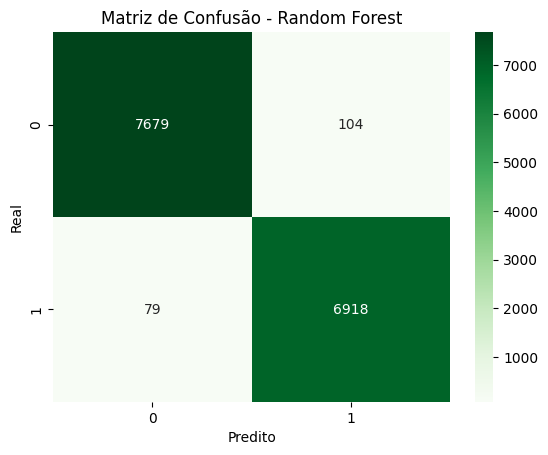

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

### Interpretação da Matriz de Confusão – Random Forest

Na matriz de confusão do modelo **Random Forest** observamos:

- Um número muito elevado de **acertos** tanto em churn (TP) como em não churn (TN).
- Valores **muito baixos** de falsos positivos e falsos negativos.

Isto significa que o Random Forest:

- **Identifica corretamente quase todos os clientes** que irão abandonar;
- Quase não comete erros a classificar clientes que permanecem.

Em termos de negócio, este desempenho é excelente, pois permite atuar de forma muito precisa sobre os clientes com maior risco de churn.

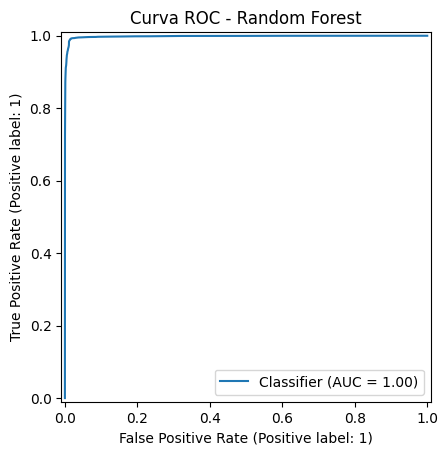

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba_rf)
plt.title("Curva ROC - Random Forest")
plt.show()

### Interpretação da Curva ROC – Random Forest

A curva ROC do Random Forest encontra-se muito próxima do canto superior esquerdo, com:

- **AUC ≈ 1.00**, o que indica uma capacidade praticamente perfeita de distinguir entre clientes churn e não churn no conjunto de teste.

Na prática, isto significa que, para os dados disponíveis:

- O Random Forest consegue ordenar os clientes quase perfeitamente do maior para o menor risco de churn.
- O modelo é muito mais forte do que a regressão logística.

Num contexto real, seria importante validar este desempenho com dados de outro período temporal ou outro mercado, para garantir que não há sobreajuste ao dataset atual.

In [ ]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

feature_importances.head(20)

,feature,importance
4,Payment Delay,0.441715
3,Support Calls,0.155739
1,Tenure,0.105203
2,Usage Frequency,0.081656
7,Gender_Male,0.068730
5,Total Spend,0.054398
0,Age,0.040520
10,Contract Length_Monthly,0.025603
6,Last Interaction,0.014383
11,Contract Length_Quarterly,0.006692


## 6. Evaluation

Foram treinados dois modelos:

- **Logistic Regression**, após normalização das variáveis numéricas;
- **Random Forest Classifier**, usando as variáveis numéricas e categóricas (one-hot encoded).

O Random Forest apresentou métricas superiores (Accuracy, F1-score e ROC AUC) em relação à regressão logística, indicando melhor capacidade de capturar relações não lineares entre as variáveis e o churn.

A análise da importância das variáveis indica que fatores como `Payment Delay`, `Support Calls`, `Tenure`, `Usage Frequency` e o tipo de contrato (`Contract Length`) são particularmente relevantes para a previsão de churn, o que alinha com os padrões observados na análise exploratória.

## 7. Deployment (visão conceptual)

Numa situação real, o modelo de churn poderia ser integrado num sistema de CRM da empresa:

1. **Scoring periódico de clientes**  
   - Diariamente ou semanalmente, os dados atualizados dos clientes seriam carregados para um sistema de scoring.
   - O modelo treinado (por exemplo, Random Forest) calcularia a probabilidade de churn para cada cliente ativo.

2. **Segmentação por risco**  
   - Clientes seriam divididos em segmentos, como:
     - Risco elevado (probabilidade > 0.7)
     - Risco médio (0.4–0.7)
     - Risco baixo (< 0.4)

3. **Ações de retenção**  
   - Para clientes de **alto risco**:
     - Contacto proativo por equipa de customer success;
     - Ofertas especiais (descontos, upgrade temporário de plano, etc.);
     - Revisão de problemas recorrentes (ex.: muitos `Support Calls`, atrasos de pagamento).
   - Para clientes de **risco médio**:
     - Comunicação personalizada (emails, campanhas);
     - Incentivos moderados.
   - Para clientes de **risco baixo**:
     - Manter bom serviço e monitorização contínua.

4. **Ciclo de melhoria contínua**  
   - Recolher feedback das campanhas de retenção;
   - Atualizar periodicamente o modelo com dados recentes;
   - Rever as variáveis mais importantes e ajustar processos de negócio (por exemplo, melhorar o suporte se o nº de `Support Calls` estiver muito associado a churn).

In [ ]:
df.to_csv("telco_churn_clean.csv", index=False)